In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
student_df = pd.read_csv('../raw_data/StudentsPerformance.csv')
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
#Data processing

#Check for null values
student_df.isnull().sum()
#Convert Frailty column to binary
label = LabelEncoder()
student_df['gender']=label.fit_transform(student_df['gender'])
student_df['race/ethnicity']=label.fit_transform(student_df['race/ethnicity'])
student_df['parental level of education']=label.fit_transform(student_df['parental level of education'])
student_df['lunch']=label.fit_transform(student_df['lunch'])
student_df['test preparation course']=label.fit_transform(student_df['test preparation course'])


student_df.to_csv('../cleaned_data/clean_student_data.csv',index=False)
student_df



     

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [42]:
# Create a new columns named 'total_score' and 'avg_score'
# Calculate total score
student_df['total_score'] = student_df[['math score', 'reading score', 'writing score']].sum(axis=1)

# Calculate average score
student_df['avg_score'] = student_df[['math score', 'reading score', 'writing score']].mean(axis=1).round(2)

print(student_df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1          72             72             74   
1                        0          69             90             88   
2                        1          90             95             93   
3                        1          47             57             44   
4                        1          76             78             75   

   total_score  avg_score  
0          218      72.67  
1          247      82.33  
2          278      92.67  
3          148      49.33  
4          229      76.33  


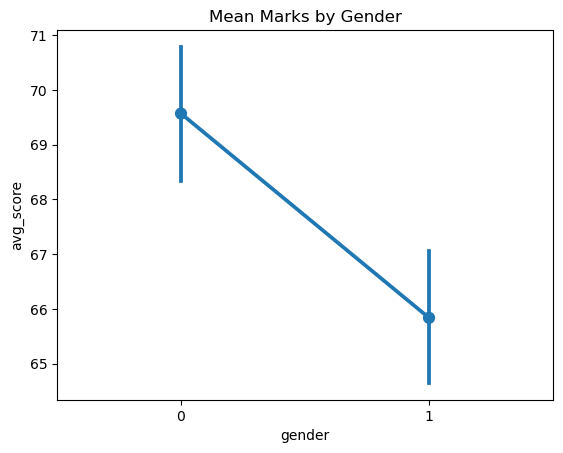

In [43]:
# Plot Avg Scores by Gender
sns.pointplot(x='gender', y='avg_score', data=student_df)
plt.title('Mean Marks by Gender')
plt.show()

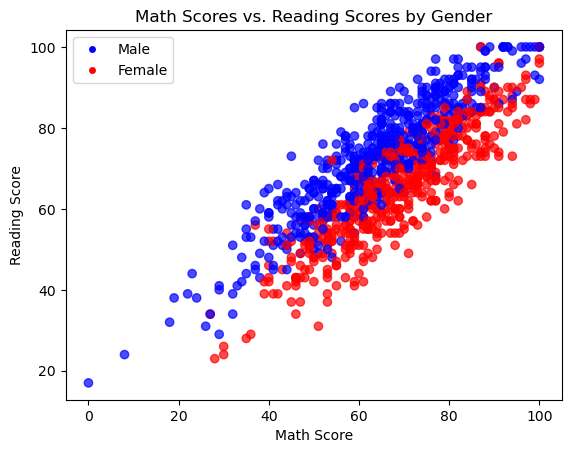

In [49]:
#Scatter plot of math scores vs. reading scores, colored by gender
plt.scatter(student_df['math score'], student_df['reading score'], c=student_df['gender'], cmap='bwr', alpha=0.7)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Scores vs. Reading Scores by Gender')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Male'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Female')])
plt.show()


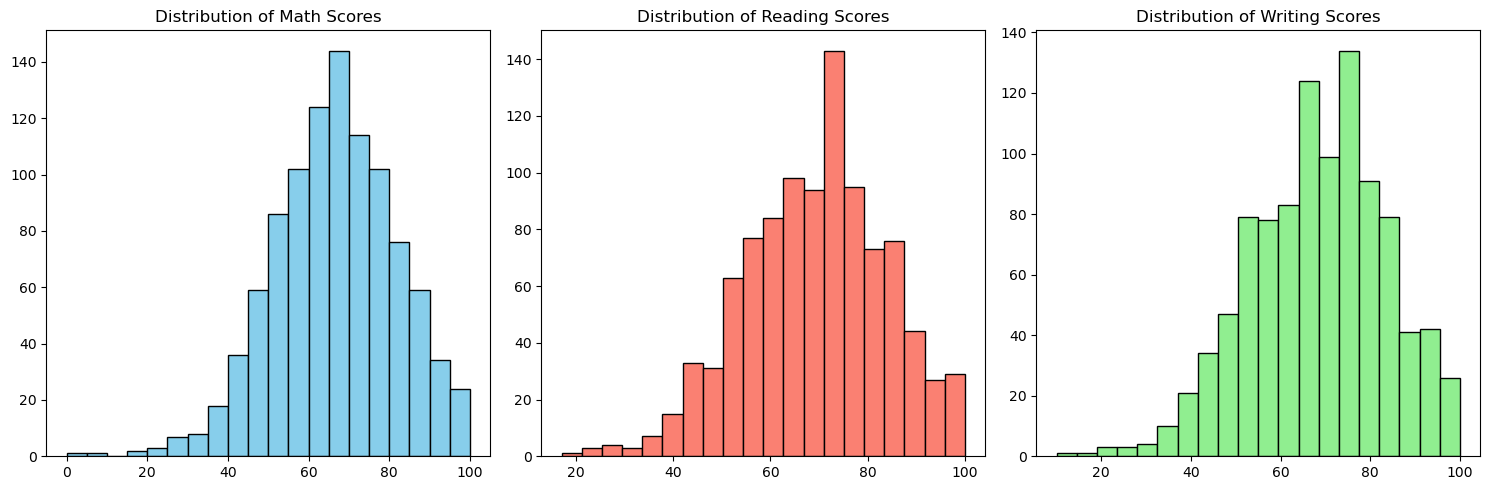

In [50]:
#Distribution of math, reading, and writing scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(student_df['math score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Scores')

plt.subplot(1, 3, 2)
plt.hist(student_df['reading score'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
plt.hist(student_df['writing score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Writing Scores')

plt.tight_layout()
plt.show()

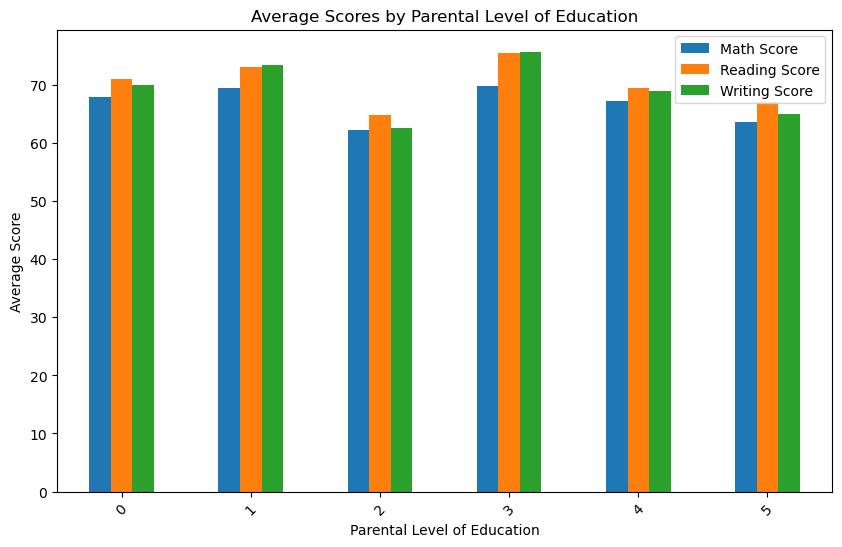

In [51]:
# Calculate average scores based on parental level of education
avg_scores = student_df.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score']]

# Plotting the average scores
avg_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Parental Level of Education')
plt.ylabel('Average Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'])
plt.show()

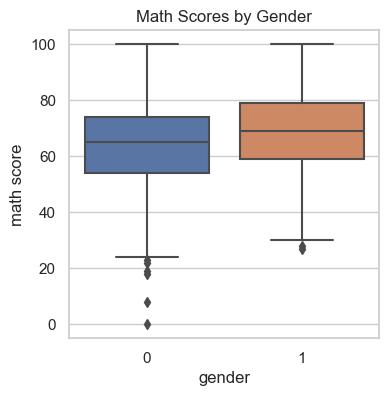

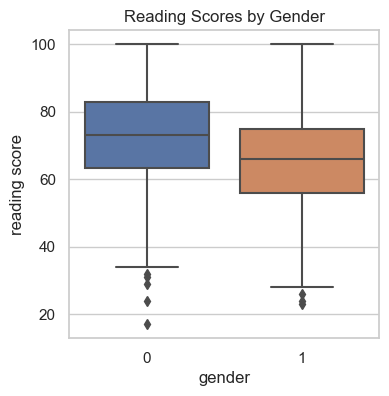

In [55]:
# Exam Scores by Gender
plt.figure(figsize=(4, 4))

sns.boxplot(x='gender', y='math score', data=student_df)
plt.title('Math Scores by Gender')

plt.figure(figsize=(4, 4))
sns.boxplot(x='gender', y='reading score', data=student_df)
plt.title('Reading Scores by Gender')
plt.show()